In [168]:
import numpy as np
import pandas as pd
import re
from dateutil import parser
from sklearn.preprocessing import LabelEncoder

In [169]:
df = pd.read_excel('C:/Users/Sujoy.Mukherjee/Python/StandAllocation/BEG.xlsx')

In [170]:
#find and fill missing values 
print("before " )
print(df[df.isnull().any(axis=1)])
df.ata.fillna(df.sta,inplace=True)
df.atd.fillna(df.std,inplace=True)
print("After " )
print(df[df.isnull().any(axis=1)])


before 
          arr      dep                 sta                 std ArrStand  \
1475  SRBIJA1  SRBIJA1 2019-01-23 14:20:00 2019-01-23 14:30:00    A13-2   
3231   CZECH1   CZECH1 2019-02-20 11:00:00 2019-02-21 12:30:00    A11-2   
3563  CTM0017  CTM0017 2019-02-25 11:00:00 2019-02-26 09:30:00      C10   
4146   GAF841   GAF841 2019-03-06 09:50:00 2019-03-06 13:30:00      N1A   
4148  MALEZI1  MALEZI1 2019-03-06 10:40:00 2019-03-06 11:40:00    A11-2   
6669  NJE246D  NJE246D 2019-04-11 11:00:00 2019-04-11 12:00:00    A11-1   
6692  NJE221M  NJE221M 2019-04-11 14:30:00 2019-04-11 16:00:00    A11-1   
7773  CTM1405  CTM1405 2019-04-24 17:10:00 2019-04-25 09:00:00       B7   

     DepStand actype        reg ata atd Origin Destination  
1475    A13-2    P44      YUBWW NaT NaT   LYBJ         BJY  
3231    A11-2   G280      OKRLV NaT NaT    BUD         BBU  
3563      C10   F2TH      FRAFC NaT NaT    LBG         SKP  
4146      N1A    321  GAF-15+04 NaT NaT    ATH         PRN  
4148    A11

In [171]:
# create a record for the time a plane typically takes for embarkation/disembarkation
df['TAT']=(df['std'] - df['sta']).dt.seconds
df['TAT'].sort_values(ascending=False)
df

,arr,dep,sta,std,ArrStand,DepStand,actype,reg,ata,atd,Origin,Destination,TAT
0,SWISS1,SWISS1,2018-12-30 13:30:00,2019-01-02 11:00:00,A14-3,A14-3,525,HBVWM,2018-12-30 13:54:00,2019-01-02 10:54:00,LIN,LIN,77400
1,JU171,JU216,2018-12-31 12:25:00,2019-01-01 00:20:00,B3,B3,AT7,YUALO,2018-12-31 12:17:00,2019-01-01 00:20:00,TGD,TIA,42900
2,SWISS1,SWISS2,2018-12-31 13:00:00,2019-01-02 14:00:00,A14-1,A14-1,PC12,HBFVO,2018-12-31 13:19:00,2019-01-02 14:15:00,QLS,QLS,3600
3,JU123,JU610,2018-12-31 16:10:00,2019-01-01 06:50:00,C9,C9,AT7,YUALP,2018-12-31 15:45:00,2019-01-01 06:50:00,SOF,PRG,52800
4,JU523,JU170,2018-12-31 16:45:00,2019-01-01 06:55:00,C10,C10,AT7,YUALN,2018-12-31 16:40:00,2019-01-01 06:58:00,SKG,TGD,51000
5,WZZ4210,WZZ4205,2018-12-31 17:10:00,2019-01-01 06:15:00,A8,A8,320,HALWO,2018-12-31 17:02:00,2019-01-01 06:05:00,MMX,GOT,47100
6,WZZ4052,WZZ4045,2018-12-31 19:55:00,2019-01-01 12:35:00,A9,A9,320,HALPJ,2018-12-31 20:35:00,2019-01-01 12:35:00,MLH,BVA,60000
7,OS737,OS738,2018-12-31 21:30:00,2019-01-01 07:50:00,A3,A3,DH4,OELGI,2018-12-31 21:23:00,2019-01-01 07:45:00,VIE,VIE,37200
8,JU535,JU810,2018-12-31 22:00:00,2019-01-01 07:55:00,C6,C6,319,YUAPB,2018-12-31 21:51:00,2019-01-01 07:50:00,FCO,TLV,35700
9,JU345,JU370,2018-12-31 22:10:00,2019-01-01 06:50:00,C5,C5,319,YUAPJ,2018-12-31 22:01:00,2019-01-01 06:50:00,STR,ZRH,31200


In [172]:
# Find gap between one gate allocation plane with the next
df=df.sort_values(by=['ArrStand','sta'])
df['gapSched']=df['sta'].diff().dt.seconds
df['gapActual']=df['ata'].diff().dt.seconds

df


,arr,dep,sta,std,ArrStand,DepStand,actype,reg,ata,atd,Origin,Destination,TAT,gapSched,gapActual
12,JU315,JU310,2018-12-31 22:55:00,2019-01-01 06:40:00,A1,A1,319,YUAPD,2018-12-31 22:43:00,2019-01-01 06:37:00,CDG,CDG,27900,NaN,NaN
17,TK1081,TK1082,2019-01-01 08:05:00,2019-01-01 09:00:00,A1,A1,73H,TCJFM,2019-01-01 07:52:00,2019-01-01 08:43:00,ISL,ISL,3300,33000.0,32940.0
20,QR231,QR232,2019-01-01 10:40:00,2019-01-01 11:40:00,A1,A1,320,A7AHB,2019-01-01 10:19:00,2019-01-01 11:39:00,DOH,DOH,3600,9300.0,8820.0
31,FZ1745,FZ1746,2019-01-01 12:15:00,2019-01-01 13:00:00,A1,A1,7M8,A6FME,2019-01-01 12:20:00,2019-01-01 13:13:00,DXB,DXB,2700,5700.0,7260.0
39,YM200,YM201,2019-01-01 14:35:00,2019-01-01 15:15:00,A1,A1,E95,4OAOA,2019-01-01 14:36:00,2019-01-01 15:15:00,TIV,TIV,2400,8400.0,8160.0
46,YM102,YM103,2019-01-01 17:45:00,2019-01-01 18:25:00,A1,A1,E95,4OAOB,2019-01-01 17:37:00,2019-01-01 18:25:00,TGD,TGD,2400,11400.0,10860.0
59,JU375,JU370,2019-01-01 22:20:00,2019-01-02 06:50:00,A1,A1,320,YUAPH,2019-01-01 22:08:00,2019-01-02 06:53:00,ZRH,ZRH,30600,16500.0,16260.0
72,TK1081,TK1082,2019-01-02 08:05:00,2019-01-02 09:00:00,A1,A1,73J,TCJYP,2019-01-02 08:15:00,2019-01-02 09:04:00,ISL,ISL,3300,35100.0,36420.0
79,QR231,QR232,2019-01-02 10:40:00,2019-01-02 11:40:00,A1,A1,321,A7AID,2019-01-02 10:11:00,2019-01-02 11:32:00,DOH,DOH,3600,9300.0,6960.0
98,LH1406,LH1407,2019-01-02 12:40:00,2019-01-02 13:35:00,A1,A1,320,DAIPT,2019-01-02 12:42:00,2019-01-02 13:38:00,FRA,FRA,3300,7200.0,9060.0


In [173]:
#find out overlap between one flight arrival - deprture vs arrival- departure of next flight for a gate.
# in case this is true, then the flight after deboarding leaves the gate, and then the next flight comes in - deboards,
# and then the next and so on.. before the first flight comes back for boarding..

In [174]:
# find out if any days of the week are significant
# find out volume /day of flights
df['day_of_week'] = df['sta'].dt.day_name()
df['hour_of_day'] = df['sta'].dt.hour
df['month_of_day'] = df['sta'].dt.month

# df.groupby(df.day_of_week).count()
df

,arr,dep,sta,std,ArrStand,DepStand,actype,reg,ata,atd,Origin,Destination,TAT,gapSched,gapActual,day_of_week,hour_of_day,month_of_day
12,JU315,JU310,2018-12-31 22:55:00,2019-01-01 06:40:00,A1,A1,319,YUAPD,2018-12-31 22:43:00,2019-01-01 06:37:00,CDG,CDG,27900,NaN,NaN,Monday,22,12
17,TK1081,TK1082,2019-01-01 08:05:00,2019-01-01 09:00:00,A1,A1,73H,TCJFM,2019-01-01 07:52:00,2019-01-01 08:43:00,ISL,ISL,3300,33000.0,32940.0,Tuesday,8,1
20,QR231,QR232,2019-01-01 10:40:00,2019-01-01 11:40:00,A1,A1,320,A7AHB,2019-01-01 10:19:00,2019-01-01 11:39:00,DOH,DOH,3600,9300.0,8820.0,Tuesday,10,1
31,FZ1745,FZ1746,2019-01-01 12:15:00,2019-01-01 13:00:00,A1,A1,7M8,A6FME,2019-01-01 12:20:00,2019-01-01 13:13:00,DXB,DXB,2700,5700.0,7260.0,Tuesday,12,1
39,YM200,YM201,2019-01-01 14:35:00,2019-01-01 15:15:00,A1,A1,E95,4OAOA,2019-01-01 14:36:00,2019-01-01 15:15:00,TIV,TIV,2400,8400.0,8160.0,Tuesday,14,1
46,YM102,YM103,2019-01-01 17:45:00,2019-01-01 18:25:00,A1,A1,E95,4OAOB,2019-01-01 17:37:00,2019-01-01 18:25:00,TGD,TGD,2400,11400.0,10860.0,Tuesday,17,1
59,JU375,JU370,2019-01-01 22:20:00,2019-01-02 06:50:00,A1,A1,320,YUAPH,2019-01-01 22:08:00,2019-01-02 06:53:00,ZRH,ZRH,30600,16500.0,16260.0,Tuesday,22,1
72,TK1081,TK1082,2019-01-02 08:05:00,2019-01-02 09:00:00,A1,A1,73J,TCJYP,2019-01-02 08:15:00,2019-01-02 09:04:00,ISL,ISL,3300,35100.0,36420.0,Wednesday,8,1
79,QR231,QR232,2019-01-02 10:40:00,2019-01-02 11:40:00,A1,A1,321,A7AID,2019-01-02 10:11:00,2019-01-02 11:32:00,DOH,DOH,3600,9300.0,6960.0,Wednesday,10,1
98,LH1406,LH1407,2019-01-02 12:40:00,2019-01-02 13:35:00,A1,A1,320,DAIPT,2019-01-02 12:42:00,2019-01-02 13:38:00,FRA,FRA,3300,7200.0,9060.0,Wednesday,12,1


In [175]:
# find out volume / day of Airlines per Arrival Stand
df.groupby(df.arr.str[:2]).count().sort_values(by='ArrStand',ascending=False)



,arr,dep,sta,std,ArrStand,DepStand,actype,reg,ata,atd,Origin,Destination,TAT,gapSched,gapActual,day_of_week,hour_of_day,month_of_day
arr,,,,,,,,,,,,,,,,,,
JU,3540,3540,3540,3540,3540,3540,3540,3540,3540,3540,3540,3540,3540,3539,3539,3540,3540,3540
WZ,611,611,611,611,611,611,611,611,611,611,611,611,611,611,611,611,611,611
LH,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483
YM,439,439,439,439,439,439,439,439,439,439,439,439,439,439,439,439,439,439
SU,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361
OS,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325
TK,249,249,249,249,249,249,249,249,249,249,249,249,249,249,249,249,249,249
LX,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201
LO,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173


In [176]:
# find out volume /day of flights

df['Flightsperday']=df.groupby(df['sta'].map(lambda x: x.date()))['sta'].transform('count')
df
#newdf['arr']

,arr,dep,sta,std,ArrStand,DepStand,actype,reg,ata,atd,Origin,Destination,TAT,gapSched,gapActual,day_of_week,hour_of_day,month_of_day,Flightsperday
12,JU315,JU310,2018-12-31 22:55:00,2019-01-01 06:40:00,A1,A1,319,YUAPD,2018-12-31 22:43:00,2019-01-01 06:37:00,CDG,CDG,27900,NaN,NaN,Monday,22,12,13
17,TK1081,TK1082,2019-01-01 08:05:00,2019-01-01 09:00:00,A1,A1,73H,TCJFM,2019-01-01 07:52:00,2019-01-01 08:43:00,ISL,ISL,3300,33000.0,32940.0,Tuesday,8,1,54
20,QR231,QR232,2019-01-01 10:40:00,2019-01-01 11:40:00,A1,A1,320,A7AHB,2019-01-01 10:19:00,2019-01-01 11:39:00,DOH,DOH,3600,9300.0,8820.0,Tuesday,10,1,54
31,FZ1745,FZ1746,2019-01-01 12:15:00,2019-01-01 13:00:00,A1,A1,7M8,A6FME,2019-01-01 12:20:00,2019-01-01 13:13:00,DXB,DXB,2700,5700.0,7260.0,Tuesday,12,1,54
39,YM200,YM201,2019-01-01 14:35:00,2019-01-01 15:15:00,A1,A1,E95,4OAOA,2019-01-01 14:36:00,2019-01-01 15:15:00,TIV,TIV,2400,8400.0,8160.0,Tuesday,14,1,54
46,YM102,YM103,2019-01-01 17:45:00,2019-01-01 18:25:00,A1,A1,E95,4OAOB,2019-01-01 17:37:00,2019-01-01 18:25:00,TGD,TGD,2400,11400.0,10860.0,Tuesday,17,1,54
59,JU375,JU370,2019-01-01 22:20:00,2019-01-02 06:50:00,A1,A1,320,YUAPH,2019-01-01 22:08:00,2019-01-02 06:53:00,ZRH,ZRH,30600,16500.0,16260.0,Tuesday,22,1,54
72,TK1081,TK1082,2019-01-02 08:05:00,2019-01-02 09:00:00,A1,A1,73J,TCJYP,2019-01-02 08:15:00,2019-01-02 09:04:00,ISL,ISL,3300,35100.0,36420.0,Wednesday,8,1,74
79,QR231,QR232,2019-01-02 10:40:00,2019-01-02 11:40:00,A1,A1,321,A7AID,2019-01-02 10:11:00,2019-01-02 11:32:00,DOH,DOH,3600,9300.0,6960.0,Wednesday,10,1,74
98,LH1406,LH1407,2019-01-02 12:40:00,2019-01-02 13:35:00,A1,A1,320,DAIPT,2019-01-02 12:42:00,2019-01-02 13:38:00,FRA,FRA,3300,7200.0,9060.0,Wednesday,12,1,74


In [177]:
# find out Aircrafttype by gate per day
df.groupby([df['sta'].map(lambda x: x.date()),'actype','ArrStand']).count()

arr  dep  sta  std  DepStand  reg  ata  atd  \
sta        actype ArrStand                                                
2018-12-30 525    A14-3       1    1    1    1         1    1    1    1   
2018-12-31 319    A1          1    1    1    1         1    1    1    1   
                  C3          1    1    1    1         1    1    1    1   
                  C4          1    1    1    1         1    1    1    1   
                  C5          1    1    1    1         1    1    1    1   
                  C6          1    1    1    1         1    1    1    1   
           320    A8          1    1    1    1         1    1    1    1   
                  A9          1    1    1    1         1    1    1    1   
           AT7    B3          1    1    1    1         1    1    1    1   
                  C10         1    1    1    1         1    1    1    1   
                  C8          1    1    1    1         1    1    1    1   
                  C9          1    1    1    1         1    1    1    1   
           DH4    A3          1    1    1    1         1    1    1    1   
           PC12   A14-1       1    1    1    1         1    1    1    1   
2019-01-01 319    A2          1    1    1    1         1    1    1    1   
                  A5          2    2    2    2         2    2    2    2   
                  A6          1    1    1    1         1    1    1    1   
                  C1          2    2    2    2         2    2    2    2   
                  C2          2    2    2    2         2    2    2    2   
                  C3          1    1    1    1         1    1    1    1   
                  C4          2    2    2    2         2    2    2    2   
                  C5          1    1    1    1         1    1    1    1   
                  C6          3    3    3    3         3    3    3    3   
           320    A1          2    2    2    2         2    2    2    2   
                  A3          2    2    2    2         2    2    2    2   
                  A4          2    2    2    2         2    2    2    2   
                  A5          2    2    2    2         2    2    2    2   
                  A6          1    1    1    1         1    1    1    1   
                  A8          1    1    1    1         1    1    1    1   
                  C2          1    1    1    1         1    1    1    1   
...                         ...  ...  ...  ...       ...  ...  ...  ...   
2019-04-30 321    C6          1    1    1    1         1    1    1    1   
           550    A13-4       1    1    1    1         1    1    1    1   
           733    A3          1    1    1    1         1    1    1    1   
                  A6          1    1    1    1         1    1    1    1   
           739    A7          1    1    1    1         1    1    1    1   
           32A    A2          1    1    1    1         1    1    1    1   
                  A4          1    1    1    1         1    1    1    1   
                  A5          2    2    2    2         2    2    2    2   
           32B    A1          1    1    1    1         1    1    1    1   
           525C   A14-3       1    1    1    1         1    1    1    1   
           73H    A3          1    1    1    1         1    1    1    1   
                  A5          1    1    1    1         1    1    1    1   
                  C1          1    1    1    1         1    1    1    1   
                  C6          1    1    1    1         1    1    1    1   
           AT5    C8          1    1    1    1         1    1    1    1   
           AT7    B3          2    2    2    2         2    2    2    2   
                  C10         3    3    3    3         3    3    3    3   
                  C7          3    3    3    3         3    3    3    3   
                  C8          5    5    5    5         5    5    5    5   
                  C9          2    2    2    2         2    2    2    2   
           CR9    C5          1    1    1    1       

In [178]:
#find out gate volume per day
df.groupby([df['sta'].map(lambda x: x.date()),'ArrStand']).count()
# Add days volume per day to the stand
df['gatevolperday']=df.groupby([df['sta'].map(lambda x: x.date()),'ArrStand'])['ArrStand'].transform('count')
df

,arr,dep,sta,std,ArrStand,DepStand,actype,reg,ata,atd,Origin,Destination,TAT,gapSched,gapActual,day_of_week,hour_of_day,month_of_day,Flightsperday,gatevolperday
12,JU315,JU310,2018-12-31 22:55:00,2019-01-01 06:40:00,A1,A1,319,YUAPD,2018-12-31 22:43:00,2019-01-01 06:37:00,CDG,CDG,27900,NaN,NaN,Monday,22,12,13,1
17,TK1081,TK1082,2019-01-01 08:05:00,2019-01-01 09:00:00,A1,A1,73H,TCJFM,2019-01-01 07:52:00,2019-01-01 08:43:00,ISL,ISL,3300,33000.0,32940.0,Tuesday,8,1,54,6
20,QR231,QR232,2019-01-01 10:40:00,2019-01-01 11:40:00,A1,A1,320,A7AHB,2019-01-01 10:19:00,2019-01-01 11:39:00,DOH,DOH,3600,9300.0,8820.0,Tuesday,10,1,54,6
31,FZ1745,FZ1746,2019-01-01 12:15:00,2019-01-01 13:00:00,A1,A1,7M8,A6FME,2019-01-01 12:20:00,2019-01-01 13:13:00,DXB,DXB,2700,5700.0,7260.0,Tuesday,12,1,54,6
39,YM200,YM201,2019-01-01 14:35:00,2019-01-01 15:15:00,A1,A1,E95,4OAOA,2019-01-01 14:36:00,2019-01-01 15:15:00,TIV,TIV,2400,8400.0,8160.0,Tuesday,14,1,54,6
46,YM102,YM103,2019-01-01 17:45:00,2019-01-01 18:25:00,A1,A1,E95,4OAOB,2019-01-01 17:37:00,2019-01-01 18:25:00,TGD,TGD,2400,11400.0,10860.0,Tuesday,17,1,54,6
59,JU375,JU370,2019-01-01 22:20:00,2019-01-02 06:50:00,A1,A1,320,YUAPH,2019-01-01 22:08:00,2019-01-02 06:53:00,ZRH,ZRH,30600,16500.0,16260.0,Tuesday,22,1,54,6
72,TK1081,TK1082,2019-01-02 08:05:00,2019-01-02 09:00:00,A1,A1,73J,TCJYP,2019-01-02 08:15:00,2019-01-02 09:04:00,ISL,ISL,3300,35100.0,36420.0,Wednesday,8,1,74,6
79,QR231,QR232,2019-01-02 10:40:00,2019-01-02 11:40:00,A1,A1,321,A7AID,2019-01-02 10:11:00,2019-01-02 11:32:00,DOH,DOH,3600,9300.0,6960.0,Wednesday,10,1,74,6
98,LH1406,LH1407,2019-01-02 12:40:00,2019-01-02 13:35:00,A1,A1,320,DAIPT,2019-01-02 12:42:00,2019-01-02 13:38:00,FRA,FRA,3300,7200.0,9060.0,Wednesday,12,1,74,6


In [179]:
#find out if the same gate is always used for arrival and departure
df.loc[df.ArrStand!=df.DepStand]
df['ArrDepStand']= df['ArrStand'] + df['DepStand']
df

,arr,dep,sta,std,ArrStand,DepStand,actype,reg,ata,atd,...,Destination,TAT,gapSched,gapActual,day_of_week,hour_of_day,month_of_day,Flightsperday,gatevolperday,ArrDepStand
12,JU315,JU310,2018-12-31 22:55:00,2019-01-01 06:40:00,A1,A1,319,YUAPD,2018-12-31 22:43:00,2019-01-01 06:37:00,...,CDG,27900,NaN,NaN,Monday,22,12,13,1,A1A1
17,TK1081,TK1082,2019-01-01 08:05:00,2019-01-01 09:00:00,A1,A1,73H,TCJFM,2019-01-01 07:52:00,2019-01-01 08:43:00,...,ISL,3300,33000.0,32940.0,Tuesday,8,1,54,6,A1A1
20,QR231,QR232,2019-01-01 10:40:00,2019-01-01 11:40:00,A1,A1,320,A7AHB,2019-01-01 10:19:00,2019-01-01 11:39:00,...,DOH,3600,9300.0,8820.0,Tuesday,10,1,54,6,A1A1
31,FZ1745,FZ1746,2019-01-01 12:15:00,2019-01-01 13:00:00,A1,A1,7M8,A6FME,2019-01-01 12:20:00,2019-01-01 13:13:00,...,DXB,2700,5700.0,7260.0,Tuesday,12,1,54,6,A1A1
39,YM200,YM201,2019-01-01 14:35:00,2019-01-01 15:15:00,A1,A1,E95,4OAOA,2019-01-01 14:36:00,2019-01-01 15:15:00,...,TIV,2400,8400.0,8160.0,Tuesday,14,1,54,6,A1A1
46,YM102,YM103,2019-01-01 17:45:00,2019-01-01 18:25:00,A1,A1,E95,4OAOB,2019-01-01 17:37:00,2019-01-01 18:25:00,...,TGD,2400,11400.0,10860.0,Tuesday,17,1,54,6,A1A1
59,JU375,JU370,2019-01-01 22:20:00,2019-01-02 06:50:00,A1,A1,320,YUAPH,2019-01-01 22:08:00,2019-01-02 06:53:00,...,ZRH,30600,16500.0,16260.0,Tuesday,22,1,54,6,A1A1
72,TK1081,TK1082,2019-01-02 08:05:00,2019-01-02 09:00:00,A1,A1,73J,TCJYP,2019-01-02 08:15:00,2019-01-02 09:04:00,...,ISL,3300,35100.0,36420.0,Wednesday,8,1,74,6,A1A1
79,QR231,QR232,2019-01-02 10:40:00,2019-01-02 11:40:00,A1,A1,321,A7AID,2019-01-02 10:11:00,2019-01-02 11:32:00,...,DOH,3600,9300.0,6960.0,Wednesday,10,1,74,6,A1A1
98,LH1406,LH1407,2019-01-02 12:40:00,2019-01-02 13:35:00,A1,A1,320,DAIPT,2019-01-02 12:42:00,2019-01-02 13:38:00,...,FRA,3300,7200.0,9060.0,Wednesday,12,1,74,6,A1A1


In [180]:
#find out if origin and destination are same
df.loc[df.Origin!=df.Destination]
df['route']=df.Origin+df.Destination
df

,arr,dep,sta,std,ArrStand,DepStand,actype,reg,ata,atd,...,TAT,gapSched,gapActual,day_of_week,hour_of_day,month_of_day,Flightsperday,gatevolperday,ArrDepStand,route
12,JU315,JU310,2018-12-31 22:55:00,2019-01-01 06:40:00,A1,A1,319,YUAPD,2018-12-31 22:43:00,2019-01-01 06:37:00,...,27900,NaN,NaN,Monday,22,12,13,1,A1A1,CDGCDG
17,TK1081,TK1082,2019-01-01 08:05:00,2019-01-01 09:00:00,A1,A1,73H,TCJFM,2019-01-01 07:52:00,2019-01-01 08:43:00,...,3300,33000.0,32940.0,Tuesday,8,1,54,6,A1A1,ISLISL
20,QR231,QR232,2019-01-01 10:40:00,2019-01-01 11:40:00,A1,A1,320,A7AHB,2019-01-01 10:19:00,2019-01-01 11:39:00,...,3600,9300.0,8820.0,Tuesday,10,1,54,6,A1A1,DOHDOH
31,FZ1745,FZ1746,2019-01-01 12:15:00,2019-01-01 13:00:00,A1,A1,7M8,A6FME,2019-01-01 12:20:00,2019-01-01 13:13:00,...,2700,5700.0,7260.0,Tuesday,12,1,54,6,A1A1,DXBDXB
39,YM200,YM201,2019-01-01 14:35:00,2019-01-01 15:15:00,A1,A1,E95,4OAOA,2019-01-01 14:36:00,2019-01-01 15:15:00,...,2400,8400.0,8160.0,Tuesday,14,1,54,6,A1A1,TIVTIV
46,YM102,YM103,2019-01-01 17:45:00,2019-01-01 18:25:00,A1,A1,E95,4OAOB,2019-01-01 17:37:00,2019-01-01 18:25:00,...,2400,11400.0,10860.0,Tuesday,17,1,54,6,A1A1,TGDTGD
59,JU375,JU370,2019-01-01 22:20:00,2019-01-02 06:50:00,A1,A1,320,YUAPH,2019-01-01 22:08:00,2019-01-02 06:53:00,...,30600,16500.0,16260.0,Tuesday,22,1,54,6,A1A1,ZRHZRH
72,TK1081,TK1082,2019-01-02 08:05:00,2019-01-02 09:00:00,A1,A1,73J,TCJYP,2019-01-02 08:15:00,2019-01-02 09:04:00,...,3300,35100.0,36420.0,Wednesday,8,1,74,6,A1A1,ISLISL
79,QR231,QR232,2019-01-02 10:40:00,2019-01-02 11:40:00,A1,A1,321,A7AID,2019-01-02 10:11:00,2019-01-02 11:32:00,...,3600,9300.0,6960.0,Wednesday,10,1,74,6,A1A1,DOHDOH
98,LH1406,LH1407,2019-01-02 12:40:00,2019-01-02 13:35:00,A1,A1,320,DAIPT,2019-01-02 12:42:00,2019-01-02 13:38:00,...,3300,7200.0,9060.0,Wednesday,12,1,74,6,A1A1,FRAFRA


In [181]:
# add previous intervals actual arrival and departure time for each gate


In [182]:
# df.drop(df[df.isnull().any(axis=1)])
df.head()

,arr,dep,sta,std,ArrStand,DepStand,actype,reg,ata,atd,...,TAT,gapSched,gapActual,day_of_week,hour_of_day,month_of_day,Flightsperday,gatevolperday,ArrDepStand,route
12,JU315,JU310,2018-12-31 22:55:00,2019-01-01 06:40:00,A1,A1,319,YUAPD,2018-12-31 22:43:00,2019-01-01 06:37:00,...,27900,NaN,NaN,Monday,22,12,13,1,A1A1,CDGCDG
17,TK1081,TK1082,2019-01-01 08:05:00,2019-01-01 09:00:00,A1,A1,73H,TCJFM,2019-01-01 07:52:00,2019-01-01 08:43:00,...,3300,33000.0,32940.0,Tuesday,8,1,54,6,A1A1,ISLISL
20,QR231,QR232,2019-01-01 10:40:00,2019-01-01 11:40:00,A1,A1,320,A7AHB,2019-01-01 10:19:00,2019-01-01 11:39:00,...,3600,9300.0,8820.0,Tuesday,10,1,54,6,A1A1,DOHDOH
31,FZ1745,FZ1746,2019-01-01 12:15:00,2019-01-01 13:00:00,A1,A1,7M8,A6FME,2019-01-01 12:20:00,2019-01-01 13:13:00,...,2700,5700.0,7260.0,Tuesday,12,1,54,6,A1A1,DXBDXB
39,YM200,YM201,2019-01-01 14:35:00,2019-01-01 15:15:00,A1,A1,E95,4OAOA,2019-01-01 14:36:00,2019-01-01 15:15:00,...,2400,8400.0,8160.0,Tuesday,14,1,54,6,A1A1,TIVTIV


In [183]:
# Finally remove records before 2018-12-31 as there is limited data for the day
df=df[(df['sta'] > '2019-01-01')]
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8280 entries, 17 to 1072
Data columns (total 22 columns):
arr              8280 non-null object
dep              8280 non-null object
sta              8280 non-null datetime64[ns]
std              8280 non-null datetime64[ns]
ArrStand         8280 non-null object
DepStand         8280 non-null object
actype           8280 non-null object
reg              8280 non-null object
ata              8280 non-null datetime64[ns]
atd              8280 non-null object
Origin           8280 non-null object
Destination      8280 non-null object
TAT              8280 non-null int64
gapSched         8280 non-null float64
gapActual        8280 non-null float64
day_of_week      8280 non-null object
hour_of_day      8280 non-null int64
month_of_day     8280 non-null int64
Flightsperday    8280 non-null int64
gatevolperday    8280 non-null int64
ArrDepStand      8280 non-null object
route            8280 non-null object
dtypes: datetime64[ns](3), float64(

In [184]:
#EDA 

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

count     8280.000000
mean     10694.521739
std      13984.620930
min          0.000000
25%       2700.000000
50%       3900.000000
75%       9900.000000
max      85500.000000
Name: TAT, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


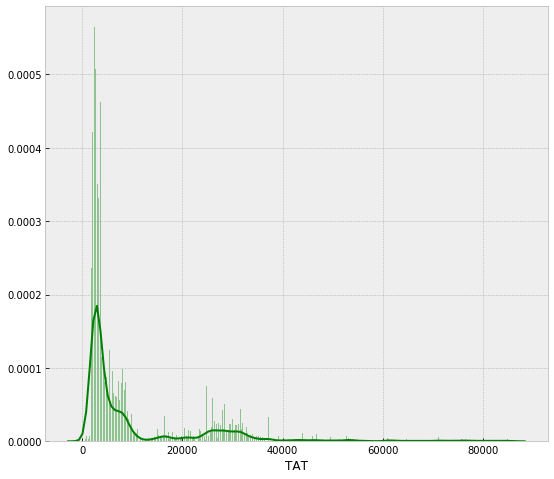

In [186]:
print(df['TAT'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['TAT'], color='g', bins=500, hist_kws={'alpha': 0.4});

count     8280.000000
mean     25286.818841
std      20080.885399
min          0.000000
25%       9885.000000
50%      18480.000000
75%      36480.000000
max      86340.000000
Name: gapActual, dtype: float64


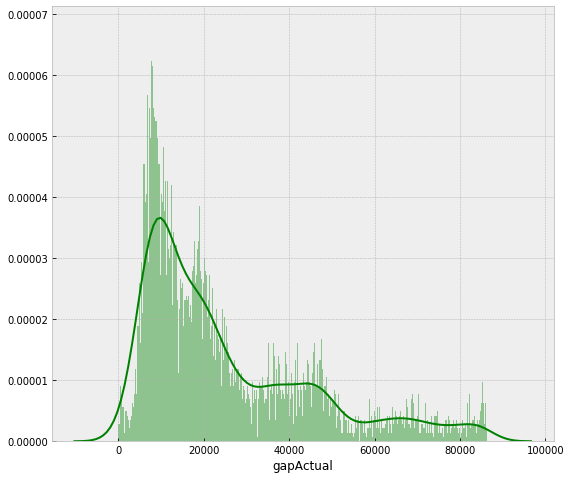

In [187]:
print(df['gapActual'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['gapActual'], color='g', bins=500, hist_kws={'alpha': 0.4});

In [188]:
# TODO later
# find out if the gate is re-allocated when the gapactual > xx time
# 1 find out the records where gate allocation is more than a threshold
# 2 find out if the gate is allocated to some other flight - i.e. sta of flight 2 
# lies between sta and std of another flight and gate allocated is the same

df.loc[df.gapActual>36480]
df.loc[df.gapActual>df.gapSched*60*60]
df.loc[df.sta  <df.ata]

,arr,dep,sta,std,ArrStand,DepStand,actype,reg,ata,atd,...,TAT,gapSched,gapActual,day_of_week,hour_of_day,month_of_day,Flightsperday,gatevolperday,ArrDepStand,route
31,FZ1745,FZ1746,2019-01-01 12:15:00,2019-01-01 13:00:00,A1,A1,7M8,A6FME,2019-01-01 12:20:00,2019-01-01 13:13:00,...,2700,5700.0,7260.0,Tuesday,12,1,54,6,A1A1,DXBDXB
39,YM200,YM201,2019-01-01 14:35:00,2019-01-01 15:15:00,A1,A1,E95,4OAOA,2019-01-01 14:36:00,2019-01-01 15:15:00,...,2400,8400.0,8160.0,Tuesday,14,1,54,6,A1A1,TIVTIV
72,TK1081,TK1082,2019-01-02 08:05:00,2019-01-02 09:00:00,A1,A1,73J,TCJYP,2019-01-02 08:15:00,2019-01-02 09:04:00,...,3300,35100.0,36420.0,Wednesday,8,1,74,6,A1A1,ISLISL
98,LH1406,LH1407,2019-01-02 12:40:00,2019-01-02 13:35:00,A1,A1,320,DAIPT,2019-01-02 12:42:00,2019-01-02 13:38:00,...,3300,7200.0,9060.0,Wednesday,12,1,74,6,A1A1,FRAFRA
166,FZ1745,FZ1746,2019-01-03 12:15:00,2019-01-03 13:00:00,A1,A1,7M8,A6FMC,2019-01-03 12:32:00,2019-01-03 13:55:00,...,2700,14400.0,15660.0,Thursday,12,1,65,5,A1A1,DXBDXB
177,YM202A,YM203A,2019-01-03 14:35:00,2019-01-03 15:15:00,A1,A1,E95,4OAOB,2019-01-03 16:36:00,2019-01-03 17:15:00,...,2400,8400.0,14640.0,Thursday,14,1,65,5,A1A1,TGDTGD
198,SU2092,SU2093,2019-01-03 21:55:00,2019-01-03 23:35:00,A1,A1,73H,VPBKN,2019-01-03 22:23:00,2019-01-03 23:10:00,...,6000,11400.0,13200.0,Thursday,21,1,65,5,A1A1,SVOSVO
211,TK1081,TK1082,2019-01-04 08:05:00,2019-01-04 09:00:00,A1,A1,73J,TCJYJ,2019-01-04 08:50:00,2019-01-04 09:36:00,...,3300,36600.0,37620.0,Friday,8,1,73,7,A1A1,ISLISL
222,AZ592,AZ591,2019-01-04 10:50:00,2019-01-04 11:45:00,A1,A1,320,EIIKG,2019-01-04 11:08:00,2019-01-04 12:00:00,...,3300,9900.0,8280.0,Friday,10,1,73,7,A1A1,FCOFCO
236,EZY5523,EZY5524,2019-01-04 12:35:00,2019-01-04 13:10:00,A1,A1,319,GEZMK,2019-01-04 13:05:00,2019-01-04 13:45:00,...,2100,6300.0,7020.0,Friday,12,1,73,7,A1A1,TXLTXL


count     8280.000000
mean     24864.202899
std      19901.680878
min          0.000000
25%       9600.000000
50%      18300.000000
75%      36300.000000
max      86100.000000
Name: gapSched, dtype: float64


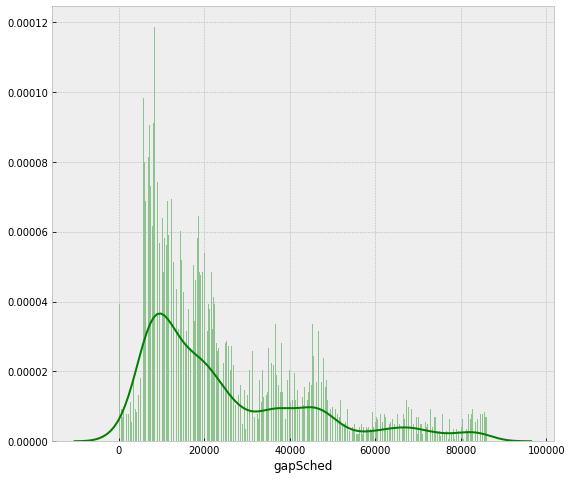

In [189]:
print(df['gapSched'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['gapSched'], color='g', bins=500, hist_kws={'alpha': 0.4});

count    8280.000000
mean        3.971981
std         1.787595
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         9.000000
Name: gatevolperday, dtype: float64


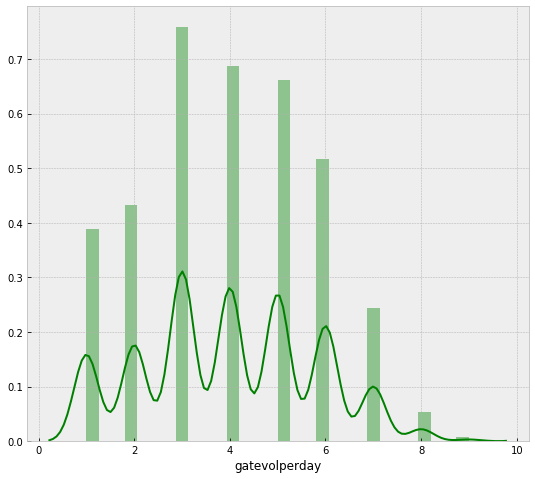

In [190]:
print(df['gatevolperday'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['gatevolperday'], color='g', bins=30, hist_kws={'alpha': 0.4});

count    8280.000000
mean       70.275604
std         9.306728
min        45.000000
25%        65.000000
50%        70.000000
75%        78.000000
max        90.000000
Name: Flightsperday, dtype: float64


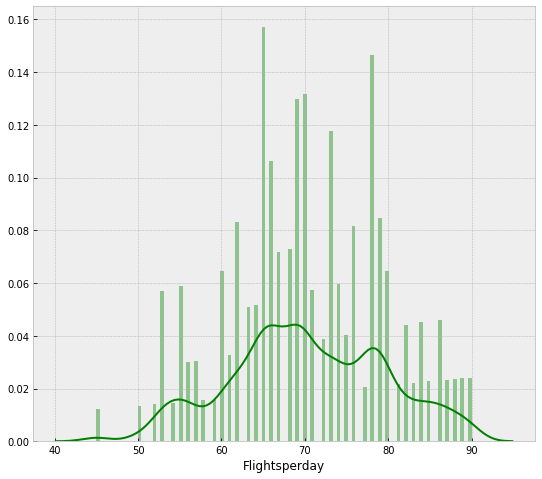

In [191]:
print(df['Flightsperday'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Flightsperday'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [192]:
# get flights per day of week
# df.groupby([df['sta'].map(lambda x: x.date()),'ArrStand'])['ArrStand'].transform('count')


In [194]:


# # #split each record into arrivals and departures, as some of the departures are more than 5 hours
# # # which means that other aircrafts may be using that boarding gate in between -- CHECK ASSUMPTION
# depGate=df[["arr","sta","ArrStand","actype","reg","ata","Origin"]]
# depGate.columns=["Flight","ScheduledTime","ArrStand","actype","reg","ActualTime","Place"]
# #print(depGate.shape)
# #print(depGate)
# #print(depGate[depGate.isnull().any(axis=1)])
# depGate.ActualTime.fillna(depGate.ScheduledTime,inplace=True)
# # print(depGate[depGate.isnull().any(axis=1)])

# arrGate=df[["dep","std","DepStand","actype","reg","atd","Destination"]]
# arrGate.columns=["Flight","ScheduledTime","ArrStand","actype","reg","ActualTime","Place"]
# # print(arrGate.shape)
# arrGate.ActualTime.fillna(arrGate.ScheduledTime,inplace=True)
# # print(arrGate[arrGate.isnull().any(axis=1)])
# # print(arrGate)

# dfconcat=pd.concat([arrGate,depGate])
# # df=arrGate
# print(dfconcat.shape)
# # print(df[df.isnull().any(axis=1)])
# #df.to_csv("abc.csv")
# # df_result=df[df.loc["ScheduledTime" >'2019-04-30']]
# # df_result

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8280 entries, 17 to 1072
Data columns (total 22 columns):
arr              8280 non-null object
dep              8280 non-null object
sta              8280 non-null datetime64[ns]
std              8280 non-null datetime64[ns]
ArrStand         8280 non-null object
DepStand         8280 non-null object
actype           8280 non-null object
reg              8280 non-null object
ata              8280 non-null datetime64[ns]
atd              8280 non-null object
Origin           8280 non-null object
Destination      8280 non-null object
TAT              8280 non-null int64
gapSched         8280 non-null float64
gapActual        8280 non-null float64
day_of_week      8280 non-null object
hour_of_day      8280 non-null int64
month_of_day     8280 non-null int64
Flightsperday    8280 non-null int64
gatevolperday    8280 non-null int64
ArrDepStand      8280 non-null object
route            8280 non-null object
dtypes: datetime64[ns](3), float64(

In [17]:
# df_result=dfconcat.loc[dfconcat.ScheduledTime>'2019-04-30']
# df=dfconcat.loc[dfconcat.ScheduledTime<'2019-04-30']

In [203]:
def get_IATA_ICAO(input_id):
    """
    Convenience function to get the the company from the flight ID

    (some of them are described with 3 characters, some of them with 2).

    """

    regex_split = re.match(r"([a-zA-Z]+)([0-9]+)", input_id)

    if regex_split:
        tentative_company = regex_split.group(1)

        # Some of the companies are described with 2 characters, one of them being numerical
        # in which case the regex would not work
        if len(tentative_company) >= 2:
            return tentative_company
        else:
            return input_id[:2]
    else:
        return input_id[:2]
    
# Data columns (total 22 columns):
# arr              8280 non-null object
# dep              8280 non-null object
# sta              8280 non-null datetime64[ns]
# std              8280 non-null datetime64[ns]
# ArrStand         8280 non-null object
# DepStand         8280 non-null object
# actype           8280 non-null object
# reg              8280 non-null object
# ata              8280 non-null datetime64[ns]
# atd              8280 non-null object
# Origin           8280 non-null object
# Destination      8280 non-null object
# TAT              8280 non-null int64
# gapSched         8280 non-null float64
# gapActual        8280 non-null float64
# day_of_week      8280 non-null object
# hour_of_day      8280 non-null int64
# month_of_day     8280 non-null int64
# Flightsperday    8280 non-null int64
# gatevolperday    8280 non-null int64
# ArrDepStand      8280 non-null object
# route            8280 non-null object

def engineer_features(df):
    df['arr'] = df['arr'].apply(get_IATA_ICAO)
    df['dep'] = df['dep'].apply(get_IATA_ICAO)
    return(df)

def encoder(df):
    
    airline_encoder = LabelEncoder()
    airline_encoder.fit(df['arr'])
    df['arr'] = airline_encoder.transform(df['arr'])

    airline_encoder.fit(df['dep'])
    df['dep'] = airline_encoder.transform(df['dep'])

    gate_encoder = LabelEncoder()
    gate_encoder.fit(df['ArrStand'])
    df['ArrStand'] = gate_encoder.transform(df['ArrStand'])
    
    gate_encoder = LabelEncoder()
    gate_encoder.fit(df['DepStand'])
    df['DepStand'] = gate_encoder.transform(df['DepStand'])

    ac_type_encoder = LabelEncoder()
    ac_type_encoder.fit(df['actype'].apply(lambda x: str(x)))
    df['actype'] = ac_type_encoder.transform(df['actype'].apply(lambda x: str(x)))
    
    registration_encoder = LabelEncoder()
    registration_encoder.fit(df['reg'])
    df['reg'] = registration_encoder.transform(df['reg'])

    origin_encoder = LabelEncoder()
    origin_encoder.fit(df['Origin'])
    df['Origin'] = origin_encoder.transform(df['Origin'])

    dest_encoder = LabelEncoder()
    dest_encoder.fit(df['Destination'])
    df['Destination'] = dest_encoder.transform(df['Destination'])
    
#     dayofweek_encoder= LabelEncoder()
#     dayofweek_encoder.fit(df['day_of_week'])
#     df['day_of_week'] = dest_encoder.transform(df['day_of_week'])

    gate_encoder = LabelEncoder()
    gate_encoder.fit(df['ArrDepStand'])
    df['ArrDepStand'] = gate_encoder.transform(df['ArrDepStand'])
    
    route_encoder = LabelEncoder()
    route_encoder.fit(df['route'])
    df['route'] = route_encoder.transform(df['route'])
    
    
    
#     print(gate_encoder.classes_)
    
    return(df)

In [204]:
#engineer the features for the whole dataframe instead of splitting and then enginnering
dfeng=engineer_features(df)
dfencode=encoder(dfeng)
dfencode
df

TypeError: expected string or bytes-like object

In [30]:
from sklearn.model_selection import train_test_split

#Change train test split using standard instead of custom method used below
features = ['ARR_Airline', 'AC_TYPE','STA_Weekday', 'STA_time_of_the_day',
                'STA_Month', 'Registration', 'Arr_Stand']
dfencode=dfencode[features]
y=dfencode['Arr_Stand'].apply(lambda x: str(x)).get_values()

#train/test
df_train, df_valid, y_train, y_valid = train_test_split(dfencode, y, test_size=0.1, random_state=1)
print(df_train.shape, y_train.shape,df_test.shape,y_test.shape)

#print(df_train)
# #train/val
# df_train, df_valid, y_train, y_valid = train_test_split(df_train, y_train, test_size=0.2, random_state=1)
# print(df_train.shape, y_train.shape,df_valid.shape,y_valid.shape)

# # train/result
# df_train, df_result, y_train, y_result = train_test_split(df_train, y_train, test_size=0.2, random_state=1)
# df_train.shape, y_train.shape,df_val.shape,y_val.shape



(14764, 7) (14764,) (3281, 7) (3281,)


In [31]:
import pickle
import numpy as np
import pandas as pd
import json
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


# features = [ # 'Registration', 
#                 'AC_TYPE', 'ARR_Airline',   'log_TTA_Hours',  'STA_time_of_the_day',  
#                 'Destination', 'Origin', 'STA_Weekday',   'STA_Month' , #'Delay_Flag',
#                 'Route']
features = ['ARR_Airline', 'AC_TYPE','STA_Weekday', 'STA_time_of_the_day',
                'STA_Month', 'Registration', 'Arr_Stand']
    




x_train = df_train[features].get_values()
y_train = df_train['Arr_Stand'].apply(lambda x: str(x)).get_values()
#print(y_train)
x_valid = df_valid[features].get_values()
y_valid = df_valid['Arr_Stand'].apply(lambda x: str(x)).get_values()

df_test=df_result
engineer_features(df_test)
encoder(df_test)



x_test = df_test[features].get_values()
y_test = df_test['Arr_Stand'].apply(lambda x: str(x)).get_values()

model = RandomForestClassifier(min_samples_leaf=5, max_depth=10, n_estimators=50)
model.fit(x_train, y_train)

print('Train Accuracy:')
print(round(accuracy_score(model.predict(x_train), y_train),2))
print('Valid Accuracy:')
print(round(accuracy_score(model.predict(x_valid), y_valid),2))
print('Test Accuracy:')
print(round(accuracy_score(model.predict(x_test), y_test),2))

first_recommendations_train_3 = np.array([model.classes_[np.argsort(model.predict_proba([i])[0])[-3::][::-1]]
                                                         for i in x_train])

first_recommendations_train_5 = np.array([model.classes_[np.argsort(model.predict_proba([i])[0])[-5::][::-1]]
                                                         for i in x_train])
diff_first_recommendations_train_3 = [(y_train[i] in first_recommendations_train_3[i]) for i in range(len(y_train))]
diff_first_recommendations_train_5 = [(y_train[i] in first_recommendations_train_5[i]) for i in range(len(y_train))]

accuracy_of_first_recommendations_train_3 = np.sum(diff_first_recommendations_train_3)/len(y_train)
accuracy_of_first_recommendations_train_5 = np.sum(diff_first_recommendations_train_5)/len(y_train)

first_recommendations_valid_3 = np.array([model.classes_[np.argsort(model.predict_proba([i])[0])[-3::][::-1]]
                                                         for i in x_valid])

first_recommendations_valid_5 = np.array([model.classes_[np.argsort(model.predict_proba([i])[0])[-5::][::-1]]
                                                         for i in x_valid])
diff_first_recommendations_valid_3 = [(y_valid[i] in first_recommendations_valid_3[i]) for i in range(len(y_valid))]
diff_first_recommendations_valid_5 = [(y_valid[i] in first_recommendations_valid_5[i]) for i in range(len(y_valid))]

accuracy_of_first_recommendations_valid_3 = np.sum(diff_first_recommendations_valid_3)/len(y_valid)
accuracy_of_first_recommendations_valid_5 = np.sum(diff_first_recommendations_valid_5)/len(y_valid)


first_recommendations_test_3 = np.array([model.classes_[np.argsort(model.predict_proba([i])[0])[-3::][::-1]]
                                                         for i in x_test])

first_recommendations_test_5 = np.array([model.classes_[np.argsort(model.predict_proba([i])[0])[-5::][::-1]]
                                                         for i in x_test])
diff_first_recommendations_test_3 = [(y_test[i] in first_recommendations_test_3[i]) for i in range(len(y_test))]
diff_first_recommendations_test_5 = [(y_test[i] in first_recommendations_test_5[i]) for i in range(len(y_test))]

accuracy_of_first_recommendations_test_3 = np.sum(diff_first_recommendations_test_3)/len(y_test)
accuracy_of_first_recommendations_test_5 = np.sum(diff_first_recommendations_test_5)/len(y_test)

tr3acc = round(accuracy_of_first_recommendations_train_3,2)
va3acc = round(accuracy_of_first_recommendations_valid_3,2)
te3acc = round(accuracy_of_first_recommendations_test_3,2)

print('Train Accuracy: Best 3')
print(tr3acc)
print('Valid Accuracy: Best 3')
print(va3acc)
print('Test Accuracy: Best 3')
print(te3acc)

print('Train Accuracy: Best 5')
print(round(accuracy_of_first_recommendations_train_5,2))
print('Valid Accuracy: Best 5')
print(round(accuracy_of_first_recommendations_valid_5,2))
print('Test Accuracy: Best 5')
print(round(accuracy_of_first_recommendations_test_5,2))   


Train Accuracy:
0.89
Valid Accuracy:
0.87
Test Accuracy:
0.25
Train Accuracy: Best 3
0.96
Valid Accuracy: Best 3
0.94
Test Accuracy: Best 3
0.32
Train Accuracy: Best 5
0.98
Valid Accuracy: Best 5
0.97
Test Accuracy: Best 5
0.44


In [32]:
df_test = df_test.reset_index(drop=True)
df_result = df_result.reset_index(drop=True)

df_test1 = df_test[features]

probs = model.predict_proba(df_test1.get_values())

best = np.argsort(-probs)

results = []
for i,row in enumerate(best):

    results.append([[stand, "{:6.2f}%".format(prob*100)] for stand, prob
                    in zip(model.classes_[row[0:3]], probs[i][row[0:3]])])

results = pd.DataFrame(results, columns=["Prediction_A", "Prediction_B", "Prediction_C"])

df_result = df_result.join(results)


ValueError: columns overlap but no suffix specified: Index(['Prediction_A', 'Prediction_B', 'Prediction_C'], dtype='object')

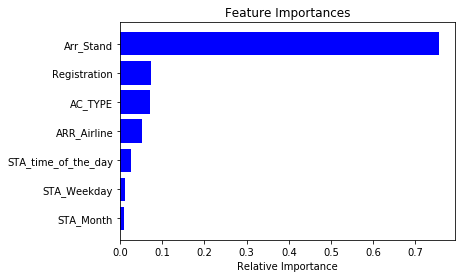

In [24]:
importances = model.feature_importances_ 
indices = np.argsort(importances)

import matplotlib.pyplot as plt
%matplotlib inline 

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [25]:
# display the relative importance of each attribute
importances = model.feature_importances_
#Sort it
print ("Sorted Feature Importance:")
sorted_feature_importance = sorted(zip(importances, features), reverse=True)
print (sorted_feature_importance)

Sorted Feature Importance:
[(0.7566960157185996, 'Arr_Stand'), (0.07387665081017364, 'Registration'), (0.07089129284174335, 'AC_TYPE'), (0.051155808429491564, 'ARR_Airline'), (0.025717263399161295, 'STA_time_of_the_day'), (0.011778416966352501, 'STA_Weekday'), (0.009884551834478329, 'STA_Month')]


In [26]:
df_result

,Flight,ScheduledTime,ArrStand,actype,reg,ActualTime,Place,Prediction_A,Prediction_B,Prediction_C
0,SRB001,2019-05-07 16:00:00,B1,FA50,YUBNA,2019-05-07 18:24:00,TIV,"[38, 62.60%]","[40, 10.62%]","[37, 8.23%]"
1,AMER1,2019-05-01 10:00:00,A14-1,525A,N188MP,2019-05-01 09:45:00,BCN,"[20, 79.44%]","[19, 6.39%]","[22, 5.17%]"
2,SLOVEN2,2019-05-01 12:30:00,A14-2,56X,S5BDM,2019-05-01 10:45:00,BNX,"[17, 12.39%]","[14, 11.36%]","[15, 10.24%]"
3,JU190,2019-04-30 07:35:00,C7,AT7,YUALN,2019-04-30 07:35:00,LJU,"[17, 33.63%]","[32, 12.20%]","[34, 10.05%]"
4,JU216,2019-04-30 00:25:00,C8,AT7,YUALP,2019-04-30 00:25:00,TIA,"[18, 78.01%]","[17, 8.81%]","[19, 5.95%]"
5,JU600,2019-04-30 06:55:00,C9,AT7,YUALU,2019-04-30 06:55:00,VIE,"[3, 38.23%]","[4, 15.22%]","[6, 10.37%]"
6,JU230,2019-04-30 07:40:00,C10,AT7,YUALT,2019-04-30 07:40:00,ZAG,"[32, 12.01%]","[34, 11.18%]","[28, 10.87%]"
7,SU2093,2019-04-30 00:45:00,C3,32A,VQBSL,2019-04-30 00:30:00,SVO,"[19, 72.92%]","[20, 11.38%]","[18, 7.64%]"
8,JU300,2019-04-30 06:45:00,A6,319,YUAPF,2019-04-30 06:45:00,BRU,"[32, 25.16%]","[20, 11.95%]","[34, 9.74%]"
9,JU310,2019-04-30 06:40:00,C5,320,YUAPG,2019-04-30 06:43:00,CDG,"[20, 48.27%]","[32, 10.19%]","[34, 7.48%]"


In [27]:
pred=[]
for i in range(df_result.shape[0]):
    arr = [df_result.Prediction_A[i][0],df_result.Prediction_B[i][0],df_result.Prediction_C[i][0]]
    pred.append(arr)   
    
df_pred =pd.DataFrame()
df_pred['pred'] = pred

df_pred['act'] = df_result['ArrStand']
df_pred['flag'] = df_pred.apply(lambda row: 1 if row.act in row.pred else 0, axis=1)

#Flight 	ScheduledTime 	ArrStand 	actype 	reg 	ActualTime 	Place
df_feat = df_result[['Flight','ScheduledTime','ArrStand','actype','reg','ActualTime','Place']]
df_pred = pd.concat([df_feat, df_pred], axis=1)
df_pred

,Flight,ScheduledTime,ArrStand,actype,reg,ActualTime,Place,pred,act,flag
0,SRB001,2019-05-07 16:00:00,B1,FA50,YUBNA,2019-05-07 18:24:00,TIV,"[38, 40, 37]",B1,0
1,AMER1,2019-05-01 10:00:00,A14-1,525A,N188MP,2019-05-01 09:45:00,BCN,"[20, 19, 22]",A14-1,0
2,SLOVEN2,2019-05-01 12:30:00,A14-2,56X,S5BDM,2019-05-01 10:45:00,BNX,"[17, 14, 15]",A14-2,0
3,JU190,2019-04-30 07:35:00,C7,AT7,YUALN,2019-04-30 07:35:00,LJU,"[17, 32, 34]",C7,0
4,JU216,2019-04-30 00:25:00,C8,AT7,YUALP,2019-04-30 00:25:00,TIA,"[18, 17, 19]",C8,0
5,JU600,2019-04-30 06:55:00,C9,AT7,YUALU,2019-04-30 06:55:00,VIE,"[3, 4, 6]",C9,0
6,JU230,2019-04-30 07:40:00,C10,AT7,YUALT,2019-04-30 07:40:00,ZAG,"[32, 34, 28]",C10,0
7,SU2093,2019-04-30 00:45:00,C3,32A,VQBSL,2019-04-30 00:30:00,SVO,"[19, 20, 18]",C3,0
8,JU300,2019-04-30 06:45:00,A6,319,YUAPF,2019-04-30 06:45:00,BRU,"[32, 20, 34]",A6,0
9,JU310,2019-04-30 06:40:00,C5,320,YUAPG,2019-04-30 06:43:00,CDG,"[20, 32, 34]",C5,0


In [57]:
df_pred.flag.value_counts()*100/df_pred.shape[0]

0    100.0
Name: flag, dtype: float64

In [58]:
df_pred[df_pred['Route']=='SM387SM388']

KeyError: 'Route'